#### Since this solution doesn't involve training a model, we won't really need dataset. 
So we would just take some Sentinel-2 images of same location at different times and use them to test the solution.

In [1]:
import os
from dotenv import load_dotenv
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
import rasterio as rio

#### Getting env variables of directories of where the jp2 images are stored and where the processed images should be saved.

In [2]:
load_dotenv()
DATA_RAW_DIR = os.getenv('DATA_RAW_DIR')
DATA_JPG_DIR = os.getenv('DATA_JPG_DIR')

#### Reading jp2 files

In [39]:
imgs_path = os.listdir(DATA_RAW_DIR)
imgs_path = [os.path.join(DATA_RAW_DIR, img) for img in imgs_path]
imgs_path

['../data/raw\\T36UXA_20180731T083601_TCI.jp2',
 '../data/raw\\T36UXA_20180919T083621_TCI.jp2',
 '../data/raw\\T36UXA_20190427T083601_TCI.jp2',
 '../data/raw\\T36UYA_20160212T084052_TCI.jp2',
 '../data/raw\\T36UYA_20190328T084011_TCI.jp2',
 '../data/raw\\T36UYA_20190616T083601_TCI.jp2']

In [40]:
imgs = []
for img_path in imgs_path:
    with rio.open(img_path) as src:
        imgs.append(src.read())

imgs = np.array(imgs)

#### Showing the images

In [41]:
def show_images(imgs, rows, cols):
    '''
    Function to plot images in a grid

    Args:
        imgs(np.array): images to plot
        rows(int): number of rows in the plot
        cols(int): number of columns in the plot
    '''
    fig = plt.figure(figsize=(20, 20))
    for i, img in enumerate(imgs):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(img.transpose(1, 2, 0))
        plt.title(f'{os.path.split(imgs_path[i])[-1]}')
    plt.tight_layout()
    plt.show()

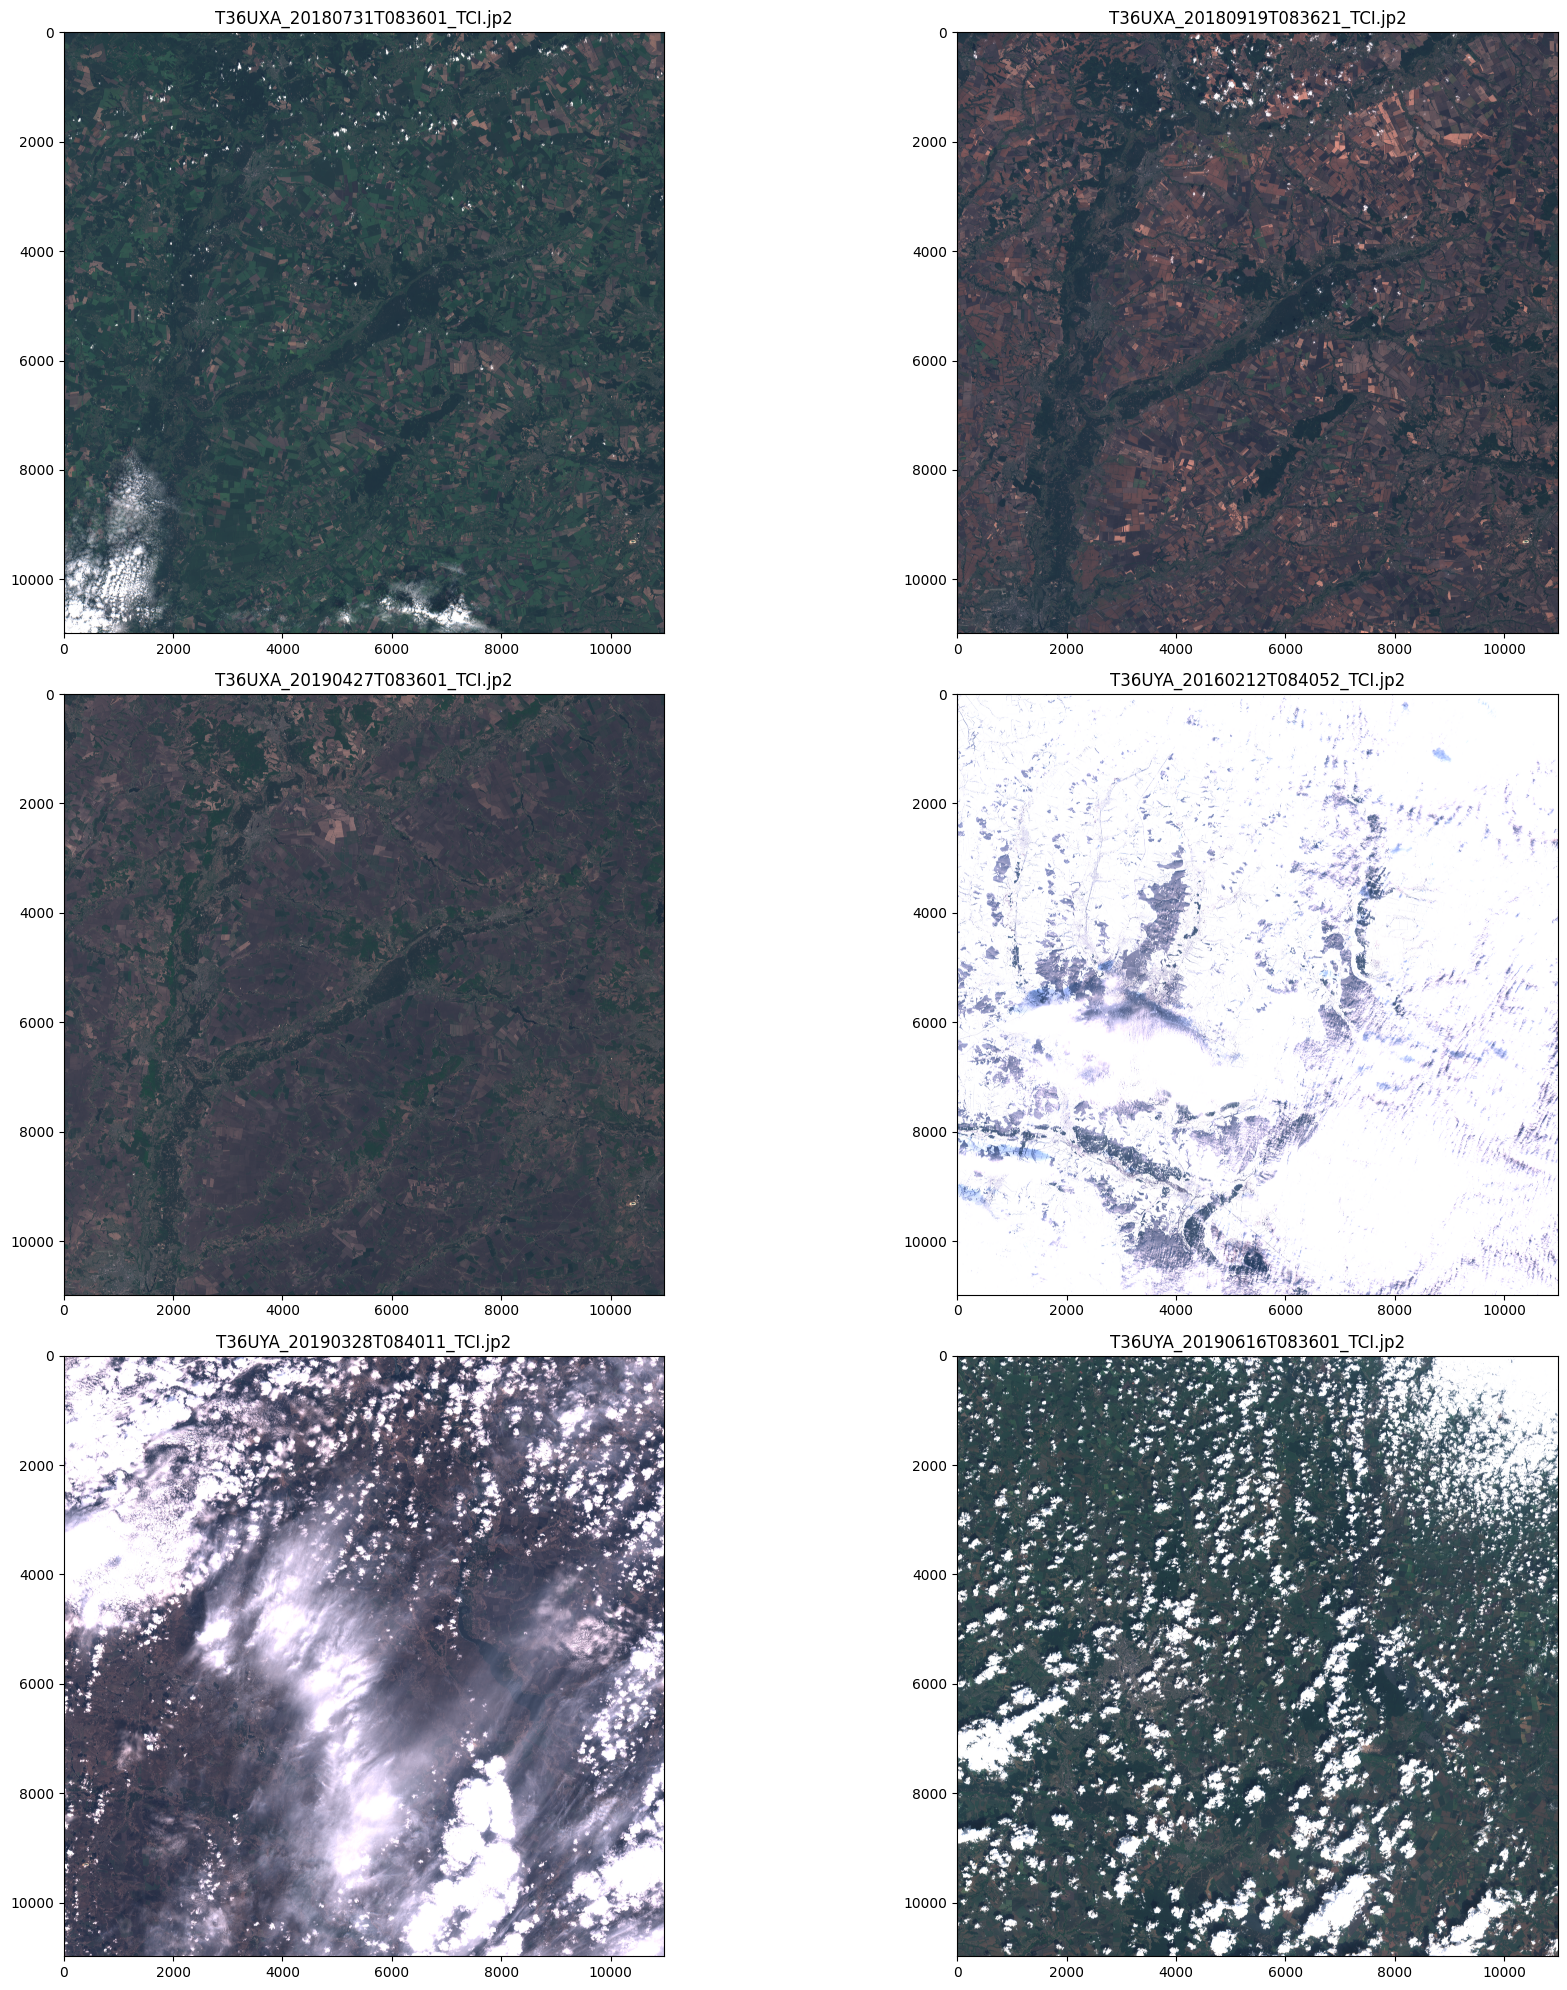

In [42]:
show_images(imgs, int(np.ceil(len(imgs)/2)), 2)

#### Saving images as jpg files to save space and time to load
Using quiality=98 we can keep the quality of the images high and save space (with quality=100 the images are about 2 times bigger).  
Also, I tried png files but they take even more space than jp2 and there wasn't any difference in the results of image matching.

In [44]:
def save_images(imgs, imgs_path, quality=98):
    '''
    Function to save images to disk

    Args:
        imgs(np.array or list of np.arrays): images to save
        imgs_path(list): paths to save images
    '''
    for i, img in enumerate(imgs):
        plt.imsave(imgs_path[i], img.transpose(1, 2, 0), pil_kwargs={'quality': quality})

if not os.path.exists(DATA_JPG_DIR):
    os.makedirs(DATA_JPG_DIR)
    
save_paths = [os.path.join(DATA_JPG_DIR, os.path.split(img_path)[-1].replace('.jp2', '.jpg')) for img_path in imgs_path]
save_images(imgs, save_paths)

In [45]:
os.listdir(DATA_JPG_DIR)

['T36UXA_20180731T083601_TCI.jpg',
 'T36UXA_20180919T083621_TCI.jpg',
 'T36UXA_20190427T083601_TCI.jpg',
 'T36UYA_20160212T084052_TCI.jpg',
 'T36UYA_20190328T084011_TCI.jpg',
 'T36UYA_20190616T083601_TCI.jpg']